Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 198 files belonging to 2 classes.
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 950ms/step - accuracy: 0.4818 - auc: 0.4547 - loss: 33.2330 - precision: 0.4818 - recall: 0.4818
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 457ms/step - accuracy: 0.5096 - auc: 0.5015 - loss: 10.2275 - precision: 0.5096 - recall: 0.5096
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step - accuracy: 0.5157 - auc: 0.5215 - loss: 8.8598 - precision: 0.5157 - recall: 0.5157
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.4756 - auc: 0.4756 - loss: 4.1641 - precision: 0.4756 - recall: 0.4756
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 545ms/step - accuracy: 0.4963 - auc: 0.5721 - loss: 1.6054 - precision: 0.4963 - recall: 0.4963
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step - accuracy: 0.5541 - auc: 0.6448 - loss: 0.9793 - precision: 0.5541 - recall: 0.5541
Epoch 7/10
7/7 ━━━

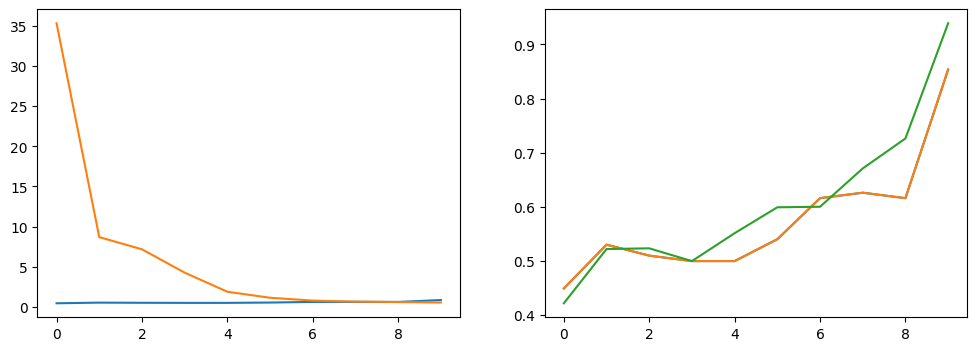

[[88 11]
 [12 87]]
              precision    recall  f1-score   support

       np300       0.88      0.89      0.88        99
        p300       0.89      0.88      0.88        99

    accuracy                           0.88       198
   macro avg       0.88      0.88      0.88       198
weighted avg       0.88      0.88      0.88       198



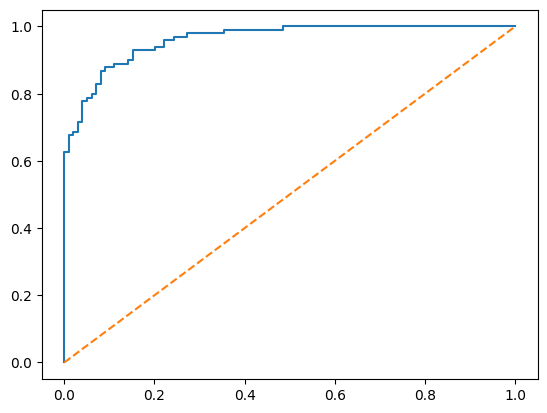

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

DATA_DIR = "/content/drive/MyDrive/tf_images"
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

train_ds = train_ds.map(lambda x, y: (x/255.0, y))

model = models.Sequential([
    layers.Input(shape=(128,128,3)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(train_ds, epochs=10)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.plot(history.history['auc'])
plt.show()

y_true, y_pred, y_prob = [], [], []

for x, y in train_ds:
    p = model.predict(x, verbose=0)
    y_true.extend(np.argmax(y.numpy(), axis=1))
    y_pred.extend(np.argmax(p, axis=1))
    y_prob.extend(p[:,1])

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=['np300','p300']))

fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.show()
